# Спрос на рейсы авиакомпании

Нужно проанализировать предпочтения пользователей, покупающих билеты на разные направления.

Требуется изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

У нас есть файлы с результатами запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.


<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Аналитика" data-toc-modified-id="Аналитика-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Аналитика</a></span></li>

## Аналитика

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
query_1 = pd.read_csv('datasets/query_1.csv')
query_3 = pd.read_csv('datasets/query_3.csv')

In [3]:
query_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [4]:
query_1.describe()

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


Посмотрим, как распределяется количество рейсов по моделям.

In [5]:
# Функция строит горизонтальный бар по сводной таблице
def grouped_barh(df, index, value, title, xlabel, ylabel, top=50, high=10):
    table = df.pivot_table(index=index,\
                                values=value).sort_values(by=value, ascending=False)\
                                .head(top)
    table.plot(kind='barh', grid=True, figsize=(10, high))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    print(table)

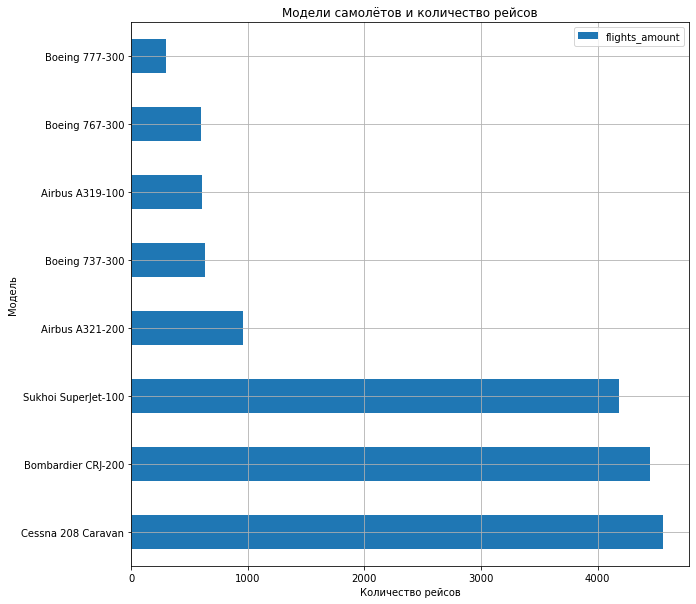

                     flights_amount
model                              
Cessna 208 Caravan             4557
Bombardier CRJ-200             4446
Sukhoi SuperJet-100            4185
Airbus A321-200                 960
Boeing 737-300                  630
Airbus A319-100                 607
Boeing 767-300                  600
Boeing 777-300                  300


In [6]:
grouped_barh(query_1, 'model', 'flights_amount',  \
             'Модели самолётов и количество рейсов', \
             'Количество рейсов', \
             'Модель')

Прослеживаются следующие тенденции:
- Cessna 208 Caravan лидирует по количеству рейсов. Так как это довольно популярная модель одномоторного самолёта в малой авиации, то число рейсов объяснимо больше, чем у крупных самолётов. Аналогично можно сравнить автобус с автомобилем:
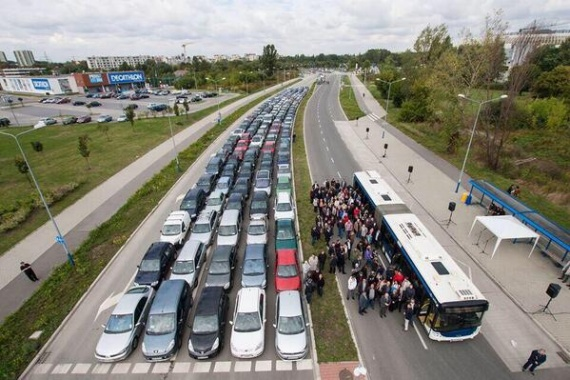
- Крупные самолёты вроде Boeing 777-300 как правило используются для перевозок на дальние расстояния. Видимо, таких направлений меньше, чем региональных. Плюс для такого самолёта нужно больше топлива, и, чтобы рейс был выгоден, нужно больше пассажиров или груза.
- Видимо, в парке множество самолётов моделей Sukhoi SuperJet-100 и Bombardier CRJ-200. Bombardier CRJ-200 распространён при региональных перевозках, а на Sukhoi SuperJet-100 запчасти вероятно дешевле. 

In [7]:
query_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [8]:
query_3.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


Отобразим на графике количество рейсов, пребывающих в город.

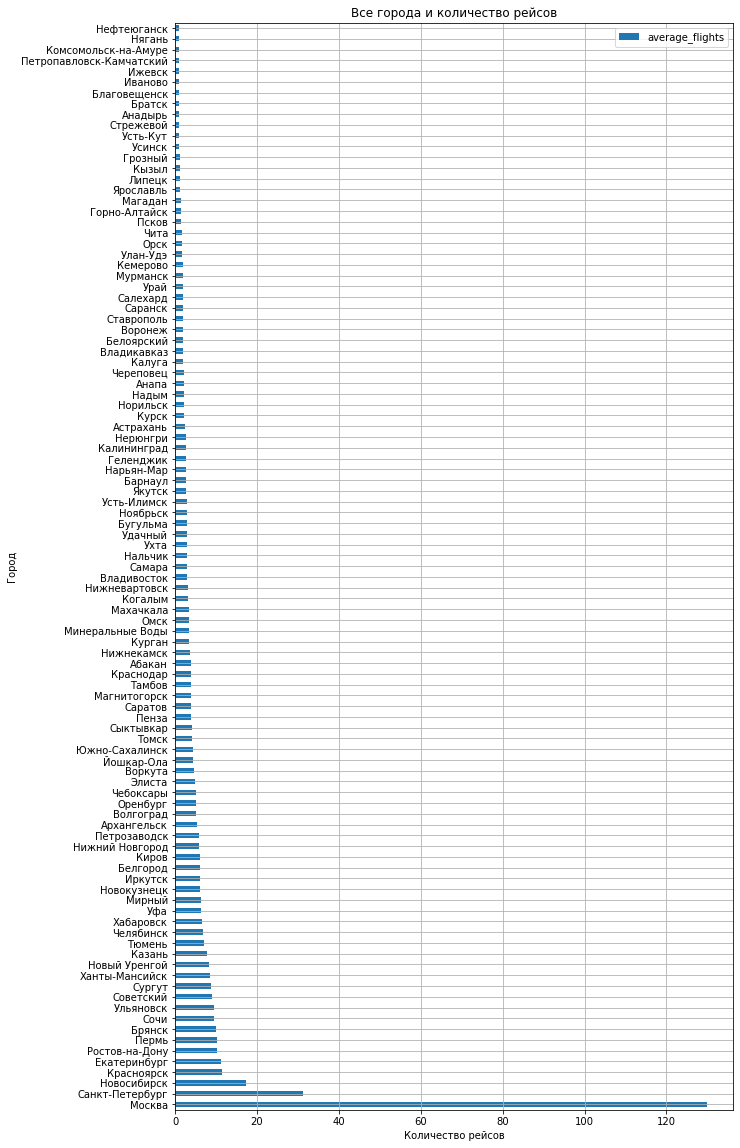

                          average_flights
city                                     
Москва                         129.774194
Санкт-Петербург                 31.161290
Новосибирск                     17.322581
Красноярск                      11.580645
Екатеринбург                    11.322581
...                                   ...
Ижевск                           1.000000
Петропавловск-Камчатский         1.000000
Комсомольск-на-Амуре             1.000000
Нягань                           1.000000
Нефтеюганск                      1.000000

[101 rows x 1 columns]


In [13]:
grouped_barh(query_3, 'city', 'average_flights',  \
             'Все города и количество рейсов', \
             'Количество рейсов', \
             'Город', 1000, 20)

Визуально не понятно, какой вклад вносят города, не входящие в топ-10.

Посмотрим количество рейсов в топ-10 городов.

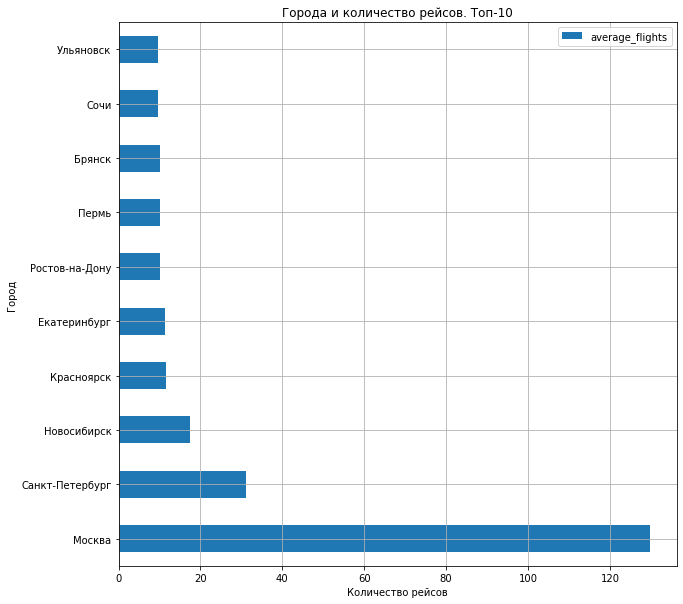

                 average_flights
city                            
Москва                129.774194
Санкт-Петербург        31.161290
Новосибирск            17.322581
Красноярск             11.580645
Екатеринбург           11.322581
Ростов-на-Дону         10.193548
Пермь                  10.129032
Брянск                 10.000000
Сочи                    9.612903
Ульяновск               9.580645


In [10]:
grouped_barh(query_3, 'city', 'average_flights',  \
             'Города и количество рейсов. Топ-10', \
             'Количество рейсов', \
             'Город', 10)

Теперь найдем суммарное среднее количество рейсов, прибывающих в другие города, не вошедшие в топ-10, и создадим для него категорию "Другие города".

In [11]:
city_flights = query_3.sort_values(by='average_flights', ascending=False).reset_index(drop=True).head(10)
city_flights = city_flights.append({'city': 'Другие города',
                     'average_flights': query_3[query_3['average_flights']< 9.58].average_flights.sum()}, ignore_index=True)
city_flights

,city,average_flights
0,Москва,129.774194
1,Санкт-Петербург,31.161290
2,Новосибирск,17.322581
3,Красноярск,11.580645
4,Екатеринбург,11.322581
5,Ростов-на-Дону,10.193548
6,Пермь,10.129032
7,Брянск,10.000000
8,Сочи,9.612903
9,Ульяновск,9.580645


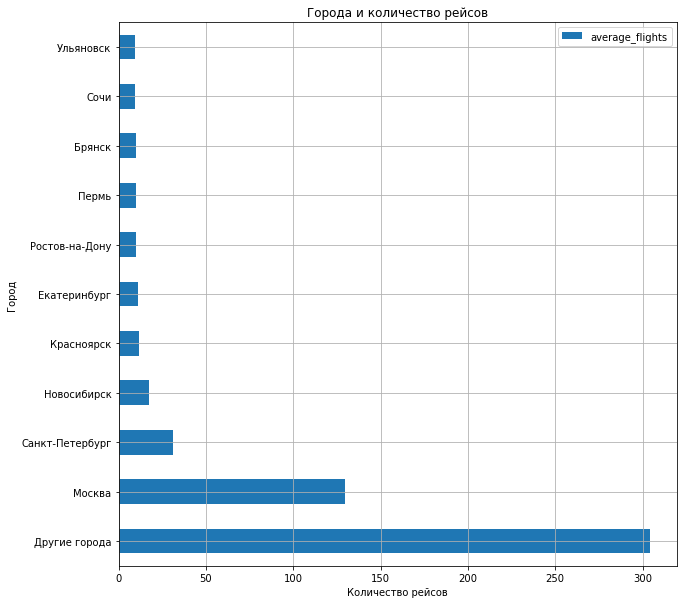

                 average_flights
city                            
Другие города         304.235681
Москва                129.774194
Санкт-Петербург        31.161290
Новосибирск            17.322581
Красноярск             11.580645
Екатеринбург           11.322581
Ростов-на-Дону         10.193548
Пермь                  10.129032
Брянск                 10.000000
Сочи                    9.612903
Ульяновск               9.580645


In [12]:
grouped_barh(city_flights, 'city', 'average_flights',  \
             'Города и количество рейсов', \
             'Количество рейсов', \
             'Город')

Таким образом, мы выяснили:
- В Москву прибывает больше рейсов, чем в любой другой город.
- В Санкт-Петербург прилетает в 4 раза меньше рейсов, чем в Москву.
- В Новосибирск прилетает в 2 раза меньше, чем в Санкт-Петербург.
- В остальные города из топ-10 в сумме прилетает почти в два раза меньше рейсов, чем в Москву.
- Городов с аэропортами так много, что в сумме в них прилетает в 2.3 раз больше рейсов, чем в Москву.